# Class: Database Systems

### Teacher: Dr. Fitzroy D. Nembhard

## Name: Riad Mohammed

### Assignment: Final Project 

### Semester: Fall 2021

#### 1. (a) (10 points) Create a database named db_airways either on localhost or your AWS instance. Create tables in your database by reducing the following ER diagram into tables and issuing the necessary DDL statements on your database. Also, insert into your database the sample data provided in the CSV files on Canvas and shown as a picture overleaf

In [1]:
#pip install mysql-connector-python

In [128]:
#Testing connection to my localhost

import mysql.connector

def main():
    host = 'localhost'
    user = 'root'
    password = "kisscake12"
    conn = mysql.connector.connect(host=host,user=user,password=password)
   
    print(conn.is_connected())

In [129]:
main()

True


In [130]:
#db_airways created on localhost
def batch_execute_ddl(conn):
    cursor = conn.cursor()
    ddl_file = open("db_airways.sql")  #opens ddl file to create tables
    sql = ddl_file.read()
     
    for result in cursor.execute(sql, multi=True):
        if result.with_rows:
            print(f"Rows produced: {result.statement}")
            print(result.fetchall())
        else:
            print(f"number of rows affetced by statement {result.statement}:{result.rowcount}") 
    
    conn.close()

In [131]:
#Connecting to my localhost
def main():
    host = 'localhost'
    user = 'root'
    password = "kisscake12"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    
    batch_execute_ddl(conn)

main()

number of rows affetced by statement create database db_airways:1
number of rows affetced by statement use db_airways:0
number of rows affetced by statement create table person
     (name     varchar(30),
	  address  varchar(30),
	  phone    varchar(30),
	  primary key (name)
	  
	  ):0
number of rows affetced by statement create table passenger
      (name           varchar(30),
	   ticket_number  varchar(30),
	   primary key (ticket_number),
	   
	   foreign key (name) references person (name)
	   
	  ):0
number of rows affetced by statement create table employee
      (name           varchar(30),
	   salary         numeric(12,2), 
	   employee_no    int,
	   
	   primary key (employee_no),
	   
	   foreign key (name) references person(name)
	   
	   ):0
number of rows affetced by statement create table flight
     (flight_number  int,
	  origin         varchar(30),
	  destination    varchar(30),
	  departure_time time,
	  arrival_time   time,
	  status         varchar(30),
	  
	  pr

### Below shows the ddl file created and imported

```sql
create database db_airways;

use db_airways;

create table person
     (name     varchar(30),
	  address  varchar(30),
	  phone    varchar(30),
	  primary key (name)
	  
	  );
	  
create table passenger
      (name           varchar(30),
	   ticket_number  varchar(30),
	   primary key (ticket_number),
	   
	   foreign key (name) references person (name)
	   
	  );
	   
	   
create table employee
      (name           varchar(30),
	   salary         numeric(12,2), 
	   employee_no    int,
	   
	   primary key (employee_no),
	   
	   foreign key (name) references person(name)
	   
	   );

create table flight
     (flight_number  int,
	  origin         varchar(30),
	  destination    varchar(30),
	  departure_time time,
	  arrival_time   time,
	  status         varchar(30),
	  
	  primary key (flight_number)
	 
	 );
	 
create table departure
     (departure_date   varchar(30),
	  flight_number    int,
	  
	  primary key (departure_date,flight_number),
	  foreign key (flight_number) references flight(flight_number)
	  
	  );
	  
create table booked_on
       (ticket_number    varchar(30),
	    departure_date   varchar(30),
		flight_number    int,
		
		primary key (ticket_number,departure_date,flight_number),
		
		foreign key (ticket_number) references passenger (ticket_number),
		foreign key (departure_date,flight_number) references departure (departure_date,flight_number)
		
		);

create table assigned_to
        (employee_no       int,
		 departure_date    varchar(30),
		 flight_number     int,
		 
		 primary key (employee_no,departure_date,flight_number),
		 
		 foreign key (employee_no) references employee (employee_no),
		 foreign key (departure_date,flight_number) references departure (departure_date,flight_number)
        	   
	    );
	   	

create table pilot
     (employee_no    int,
	  flight_Hours   int,
	  
	  foreign key (employee_no) references employee(employee_no)
	  
	  );
	  
create table plane
     (maker      varchar(30),
	  model_no   varchar(30),
	  
	  
	  primary key(model_no)
	  
	  );

create table can_fly
      (employee_no  int,
	   model_no     varchar(30),
	   
	   primary key(employee_no,model_no),
	   foreign key (employee_no) references employee(employee_no),
	   foreign key (model_no) references plane(model_no)
	   
	   );

create table aircraft
      (serial_no  int,
	   model_no   varchar(30),
	   
	   primary key(serial_no,model_no),
	   foreign key (model_no) references plane(model_no)
	   
	   );

```

In [132]:
import mysql.connector
import csv

In [133]:
#inserting data into database from CSV files
def batch_execute(conn):
    cursor = conn.cursor()
    cursor.execute('USE db_airways')
    
    tables = ['person', 'employee', 'flight', 'departure', 'pilot', 'plane', 'can_fly', 'aircraft'] #Tables based on given CSV files
    
    for name in tables:
        rows=[]
        fp = open(name + '.csv','r') #Opens CSV File
        csv_reader = csv.reader(fp)
        next(csv_reader)
        
        for row in csv_reader:
            rows.append(tuple(row))
            
        fp.close()
        
        sql_command = f'INSERT INTO {name} VALUES (%s{", %s"  * (len(rows[0]) -1)});' #Inserting data into databse
        cursor.executemany(sql_command, rows)
        conn.commit()
        
        print(f'Rows affected in {name}: {cursor.rowcount}') #Shows how many rows affected from data insertion
              
    conn.close()

In [134]:
def main():
    host = 'localhost'
    user = 'root'
    password = "kisscake12"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    batch_execute(conn)
main()

Rows affected in person: 13
Rows affected in employee: 7
Rows affected in flight: 17
Rows affected in departure: 13
Rows affected in pilot: 3
Rows affected in plane: 9
Rows affected in can_fly: 9
Rows affected in aircraft: 13


#### (b) (5 points) Write SQL statements to insert the following passenger bookings and employee assignments into the database. Note that the following data does not represent tables. Insert the data based on your ERD reduction

In [135]:
import mysql.connector
import csv

def batch_execute(conn):
    cursor = conn.cursor()
    cursor.execute('USE db_airways')
    
    tables = ['passenger', 'booked_on', 'assigned_to'] # Three(3) tables created from data given into CSV files 
                                                       # to insert passenger, booked on and assigned_to
                                                      

    for name in tables:
        rows=[]
        fp = open(name + '.csv','r')  #Opens CSV file
        csv_reader = csv.reader(fp)
        next(csv_reader)
        
        for row in csv_reader:
            rows.append(tuple(row))
            
        fp.close()
        
        sql_command = f'INSERT INTO {name} VALUES (%s{", %s"  * (len(rows[0]) -1)});' #Inserts NEW data into database using sql statements
        cursor.executemany(sql_command, rows)
        conn.commit()
        
        print(f'Rows affected in {name}: {cursor.rowcount}') #Shows how many rows affected from data insertion 
              
    conn.close()


In [136]:
def main():
    host = 'localhost'
    user = 'root'
    password = "kisscake12"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    batch_execute(conn)
main()

Rows affected in passenger: 12
Rows affected in booked_on: 12
Rows affected in assigned_to: 14


Below is the passenger csv created and imported from the data

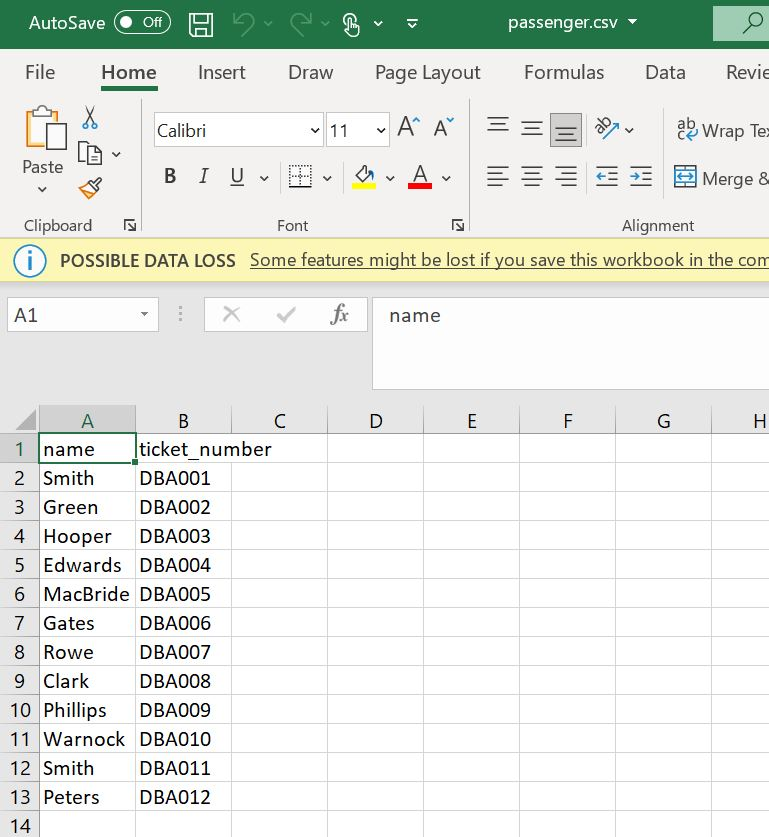

Below is the booked on CSV file created from the data

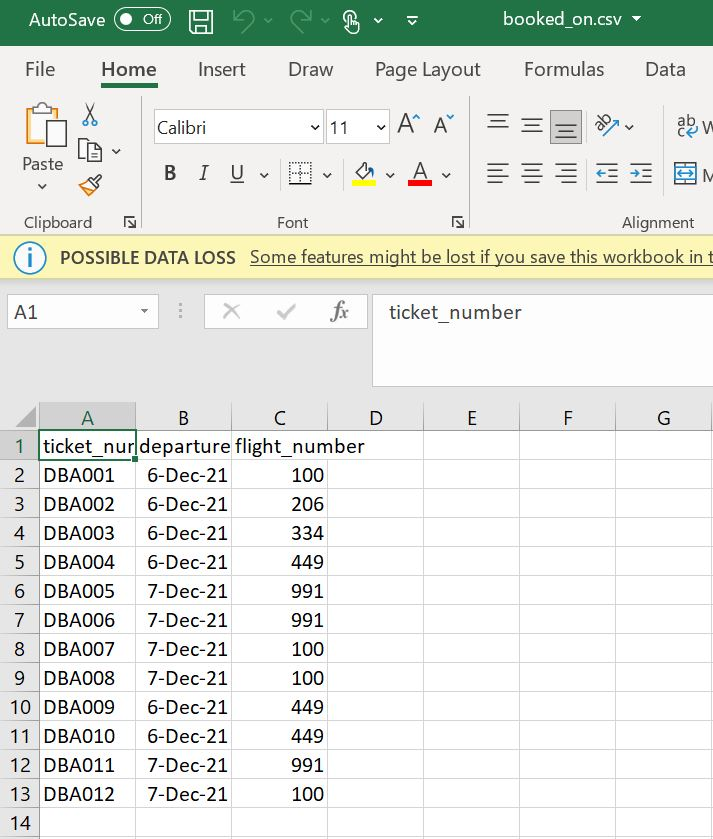

Below is the assigned_to CSV file created from the data

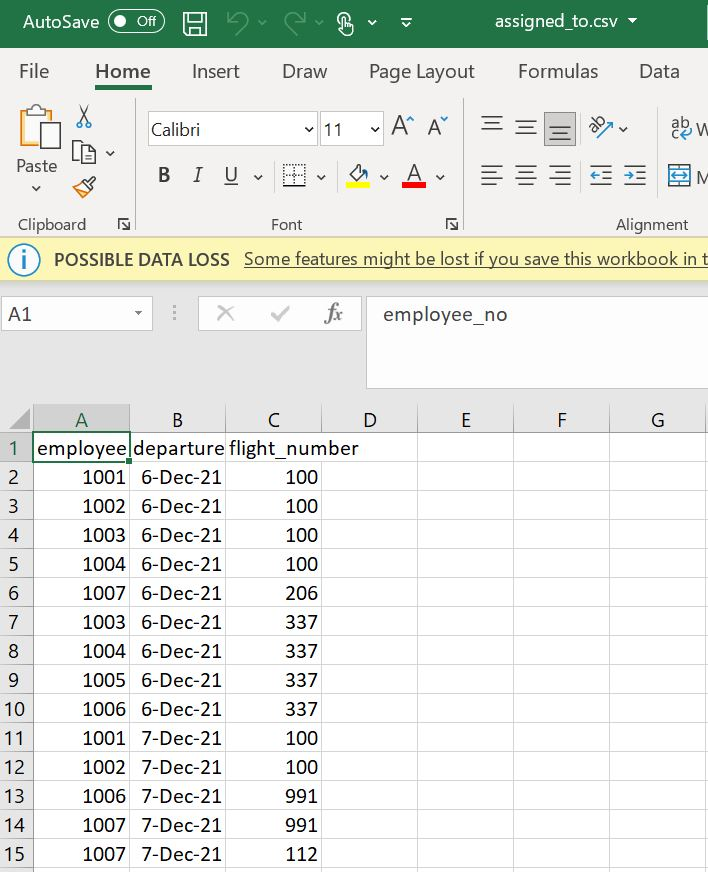

#### (c) (5 points) Write a single query that returns a list of all employees who are assigned to flights departing on December 7, 2021. Include the following fields in your result: employee_name, flight_number, origin, destination, departure_time, arrival_time, flight_duration, address, phone

In [137]:
import mysql.connector
host = 'localhost'
user = 'root'
password = "kisscake12"
conn = mysql.connector.connect(host=host,user=user,password=password)

cursor=conn.cursor()
cursor.execute('USE db_airways')

#Below is the single query created to join (inner) the required tables to get the specified output

query="""select e.name,A.employee_no,A.flight_number,A.departure_date,f.origin,f.destination,f.departure_time,f.arrival_time,
         TIMEDIFF(f.arrival_time,f.departure_time),p.address,p.phone from assigned_to as A
         inner join employee as e on e.employee_no=A.employee_no
         inner join flight as f on f.flight_number=A.flight_number
         inner join person as p on e.name=p.name
         where A.departure_date="December 7, 2021" """

cursor.execute(query)
results=cursor.fetchall()

#Below is the output formatted based on the required data needed to be displayed

print ("{:<7} {:<15} {:<15} {:<7} {:<10} {:<8} {:>8} {:>10} {:>10} {:>10}".format('Name','flight_number','departure_date','origin','destination','departure time','arrival time','duration','address','phone'))
for names in results:
    name,employee_no,flight_number,departure_date,origin,destination,departure_time,arrival_time,TIMEDIFF,address,phone=names
    print (f"{name:<7} {flight_number:<6} {departure_date:>23} {origin:>4} {destination:>7} {str(departure_time):>16} {str(arrival_time):>14} {str(TIMEDIFF):>13} {address:>13} {phone:<10}")
conn.close()

Name    flight_number   departure_date  origin  destination departure time arrival time   duration    address      phone
Jones   100           December 7, 2021  SLC     BOS          8:00:00       17:50:00       9:50:00   234 Oak St. 801-552-2943
Peters  100           December 7, 2021  SLC     BOS          8:00:00       17:50:00       9:50:00  345 Pine St. 801-393-2230
Warnock 112           December 7, 2021  DCA     DEN         14:00:00       18:07:00       4:07:00  775 Main St. 801-303-2222
Clark   991           December 7, 2021  BOS     ORD         17:00:00       18:22:00       1:22:00  223 Easy St. 801-193-2320
Warnock 991           December 7, 2021  BOS     ORD         17:00:00       18:22:00       1:22:00  775 Main St. 801-303-2222


#### (d) (10 points) It has been estimated that airline pilots fly an average of 75 hours per month. Write a procedure named “estimate_pilot_years” that accepts a pilot’s employee ID and returns the number of years the pilot has been flying based on their flight hours in the database. (Assume the pilots at DB Airways work for 12 months per year. Do not worry about overtime, breaks, or any other complicating factor). Test your procedure by prompting the user for a pilot ID and printing out the number of years the pilot has been working for DB Airways

In [138]:
flag = 0 #allows for prodecure to be run only once

In [140]:
import mysql.connector #question4

host = 'localhost'
user = 'root'
password = "kisscake12"
conn = mysql.connector.connect(host=host,user=user,password=password)

cursor=conn.cursor()
cursor.execute('USE db_airways')

#ensures procedure only runs once to allow for multiple recall of this code block
if (flag==0):   
    command = f""" 
                  CREATE PROCEDURE estimate_pilot_years (IN pilot_id INT)
                  BEGIN
                        SELECT (flight_hours/8760) from pilot
                        WHERE pilot.employee_no = pilot_id;
                  END
              """
    cursor.execute(command)
    conn.commit()
    
    flag=1 #flag check

p_id= int(input("Enter Pilot's ID: ")) #User prompt to enter a valid pilot's ID
args = (p_id,)
cursor.callproc('estimate_pilot_years',args)
       
for result in cursor.stored_results():
    print("Number of years worked for DB Airways: ",round(result.fetchone()[0],1),"years")
            
cursor.close()
conn.close()

Enter Pilot's ID: 1002
Number of years worked for DB Airways:  3.4 years
